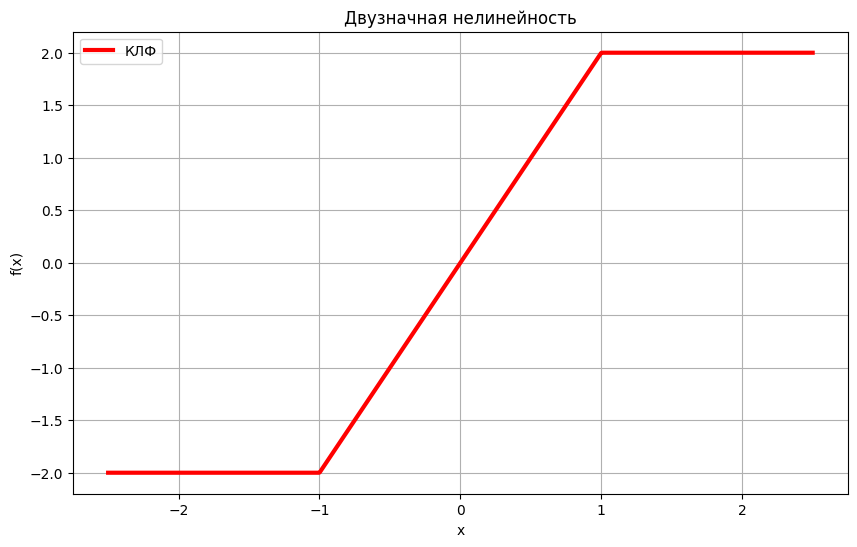

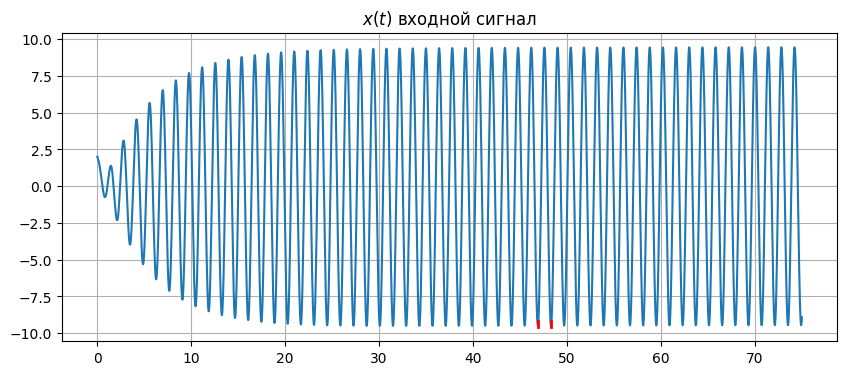

1.4066016504125969
9.44
4.47


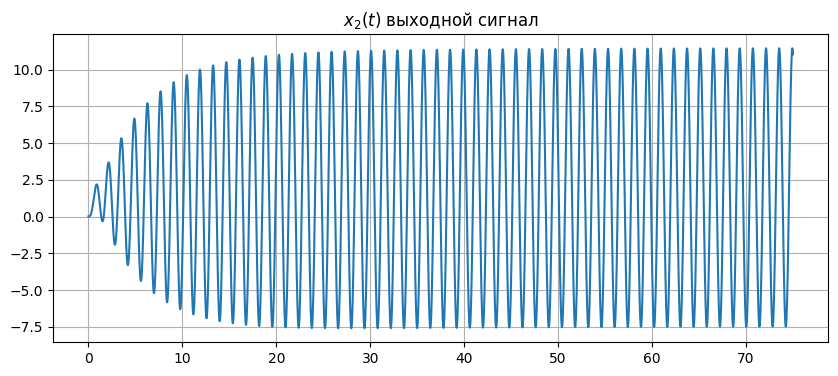

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint



# Определение функции F(x)
def F(x):
    if x < -1:
        return -2
    elif -1 <= x < 1:
        return 2 * x
    else:  # x >= 1
        return 2



# Определение модели системы
def model(y, t, u):
    x1, x2, y1, y2 = y
    
    x = u - x1 - x2  # Первое уравнение
    dx1dt = F(x)  # Нелинейная функция
    dx2dt = y1    # Второе уравнение
    dy1dt = y2    # Третье уравнение
    dy2dt = 2 * x1 + 30 * F(x) - 0.4 * y2 - 20 * y1  # Четвертое уравнение
    
    return [dx1dt, dx2dt, dy1dt, dy2dt]


x_for_F = np.linspace(-2.5, 2.5, 1000)
y_for_F = []
for vals in x_for_F:
    y_for_F.append(F(vals))



plt.figure(figsize=(10, 6))
plt.plot(x_for_F, y_for_F, 'r', label=fr'КЛФ', linewidth=3)
plt.title(fr'Двузначная нелинейность')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


# Временной вектор
t = np.linspace(0, 75, 4000)
# Начальные условия
y0 = [0, 0, 0, 0]  # [x1, x2, y1, y2]

# Входной сигнал (например, ступенчатая функция)
u = 2  # Пример постоянного входа

# Решение системы
sol = odeint(model, y0, t, args=(u,))


t1 = 46.8867216804201
t2 = 48.2933233308327
delta_t = np.abs(t1 - t2)
# Построение графиков
plt.figure(figsize=(10, 4))
plt.plot(t, u - sol[:, 1] - sol[:, 0] , label=fr'$x(t)$')
plt.plot([t2, t2], [-9.6, -9.2], color='red', linewidth=2)
plt.plot([t1, t1], [-9.6, -9.2], color='red', linewidth=2)
plt.title(fr'$x(t)$ входной сигнал')
plt.grid() 
plt.show()


print(delta_t)
A_max = max(u - sol[:, 1] - sol[:, 0])
print(np.round(A_max,2))
print(np.round(2*np.pi/delta_t, 2))
# print(max(sol[:, 1]))

plt.figure(figsize=(10, 4))
plt.plot(t, sol[:, 1], label=fr'$x_2(t)$')
plt.title(fr'$x_2(t)$ выходной сигнал')
plt.grid()

plt.show()


# for i in range(len(t)):
#     print(f't = {t[i]}, x = {u - sol[i, 1] - sol[i, 0]}')


## A = 9.45 |  T = 1.38  | w = 2pi/T = 4.55


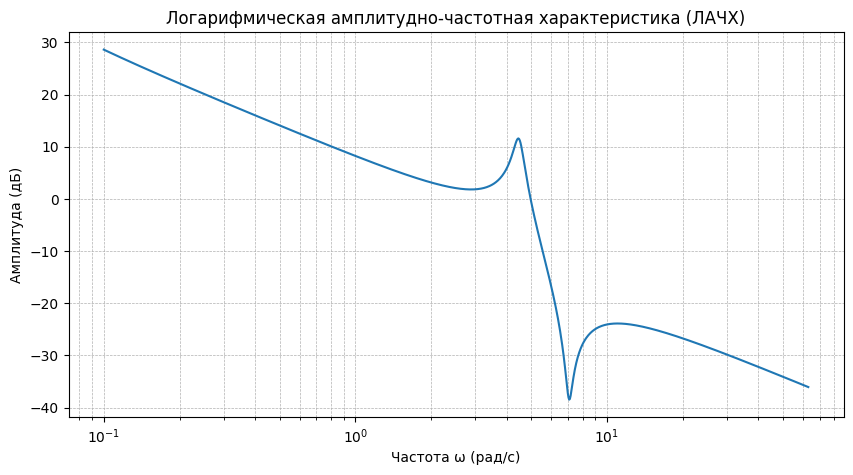

θ min (rad) = -4.42376, θ min (deg) = -253.46
log10(ω min) = 0.76296, ω min = 10^0.76296 = 5.7938


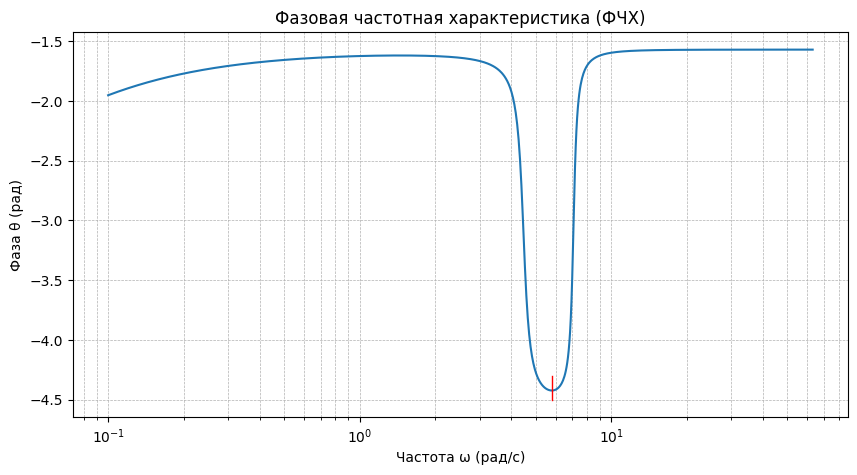

In [69]:
w = np.logspace(-1, 1.8, 1000)  # От 0.1 до ~65 рад/с


def W(s):
    return (s**3 + 0.4*s**2 + 50*s + 2)/(s**4 + 0.4*s**3 + 20*s**2)

W_val = W(1j * w)

H_val = np.abs(W_val)
theta_val = np.angle(W_val)
theta_val = np.where(theta_val > 0, theta_val - 2 * np.pi, theta_val)






# Построение ЛАЧХ
plt.figure(figsize=(10, 5))
plt.semilogx(w, 20 * np.log10(H_val))
# plt.plot(w, 20 *  np.log10(H))
# plt.semilogx()
plt.title('Логарифмическая амплитудно-частотная характеристика (ЛАЧХ)')
plt.xlabel('Частота ω (рад/с)')
plt.ylabel('Амплитуда (дБ)')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()
# Построение ФЧХ




plt.figure(figsize=(10, 5))
plt.semilogx(w, theta_val)


theta_min = min(theta_val)

for i in range(len(w)):
    if theta_val[i] ==  theta_min:
        w_min = w[i]
        
        
plt.plot([w_min, w_min], [-4.5, -4.3], color='red', linewidth=1)

print(f'θ min (rad) = {np.round(theta_min, 5)}, θ min (deg) = {np.round(theta_min * 180/np.pi, 2)}')
print(f'log10(ω min) = {np.round(np.log10(w_min), 5)}, ω min = 10^{np.round(np.log10(w_min), 5)} = {np.round(w_min, 4)}')


plt.title('Фазовая частотная характеристика (ФЧХ)')
plt.xlabel('Частота ω (рад/с)')
plt.ylabel('Фаза θ (рад)')
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()




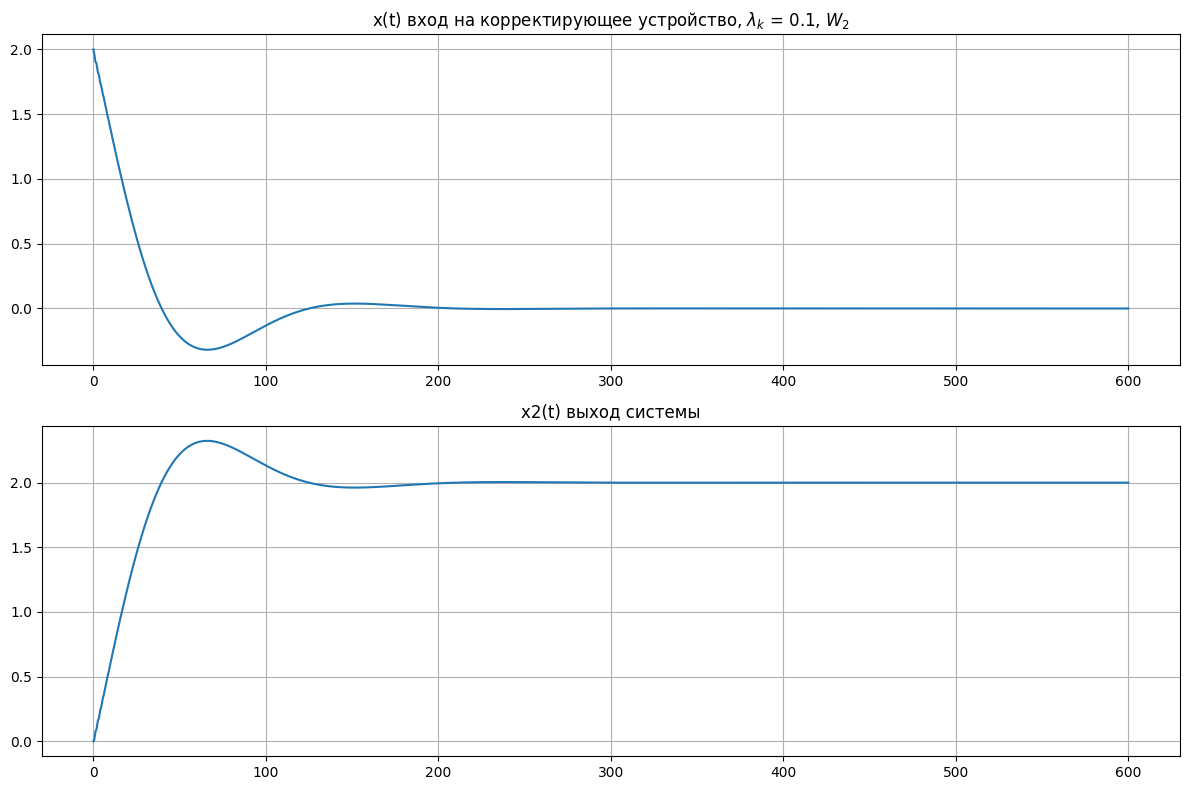

In [72]:
# Определение функции F(x)
def F(x):
    if x < -1:
        return -2
    elif -1 <= x < 1:
        return 2 * x
    else:  # x >= 1
        return 2
    
def Fp(x):
    if x < -1:
        return 0
    elif -1 <= x < 1:
        return 2
    else:  
        return 0



lam = 0.1

w_kor = 5.793
wT = 1
Tkor = wT/w_kor

def model_2(y, t, u):
    x1, x2, x, z, y1, y2 = y
    
    x3 = u - x1 - x2
    
    dx1dt = F(x)
    dx2dt = y1
    dy1dt = y2
    dy2dt = 2*x1 + 30 * F(x) - 0.4*y2 - 20*y1
    
    dxdt = z
    
    dzdt = 1/(lam*Tkor)**2 * ((lam*Tkor)**2 * (-Fp(x)*z - y2) + 2*Tkor*lam**2 * (-F(x) - y1) + lam**2*x3 - 2*Tkor*lam*z - x)
    
    return [dx1dt, dx2dt, dxdt, dzdt ,dy1dt, dy2dt]




# Временной вектор
t_kor = np.linspace(0, 600, 4000)
# Начальные условия
y0_2 = [0, 0, 0, 0, 0, 0]

# Входной сигнал (например, ступенчатая функция)
u = 2  # Пример постоянного входа

# Решение системы
sol_kor = odeint(model_2, y0_2, t_kor, args=(u,))

x_t = u - sol_kor[:, 1] - sol_kor[:, 2]
x_2 = sol_kor[:, 1]

# Построение графиков
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t_kor ,x_t , label='x(t)')
plt.title(fr'x(t) вход на корректирующее устройство, $\lambda_k$ = {lam}, $W_2$')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t_kor, x_2, label='x2(t)')
plt.title('x2(t) выход системы')
plt.grid()

plt.tight_layout()
plt.show()

## A = 9.45 |  T = 1.38  | w = 2pi/T = 4.55


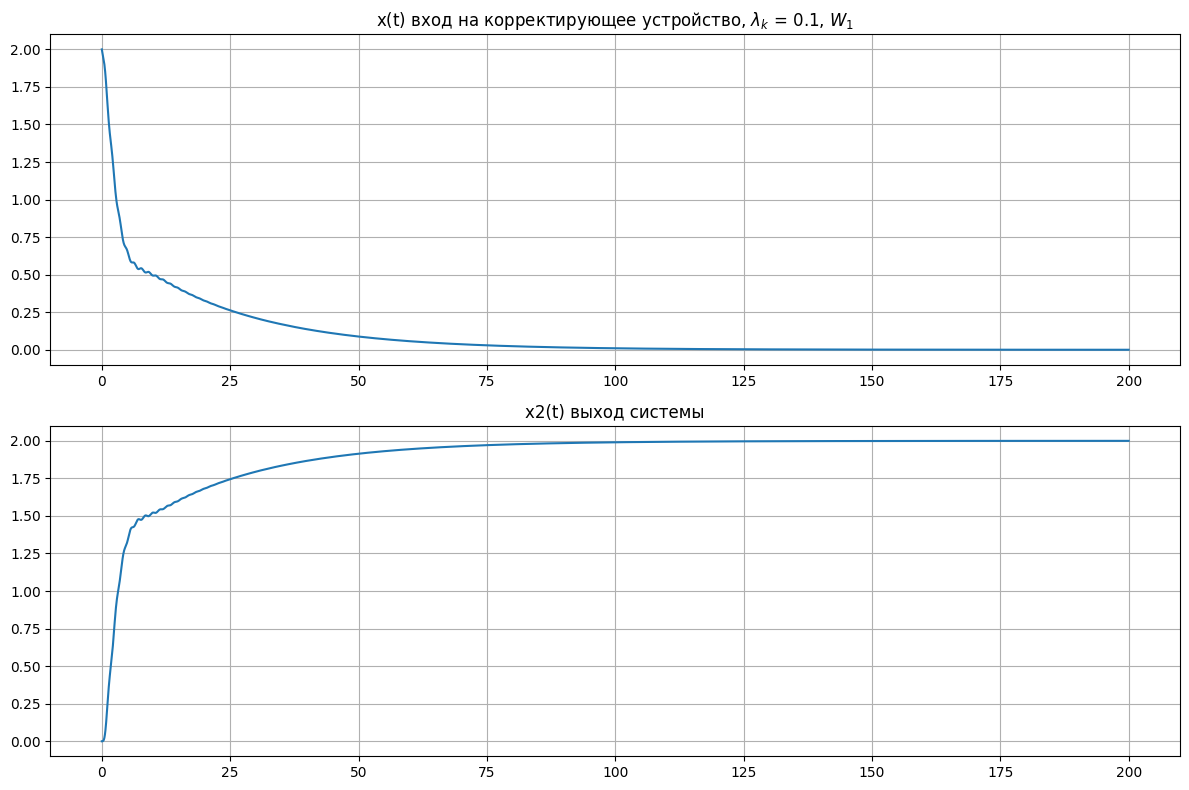

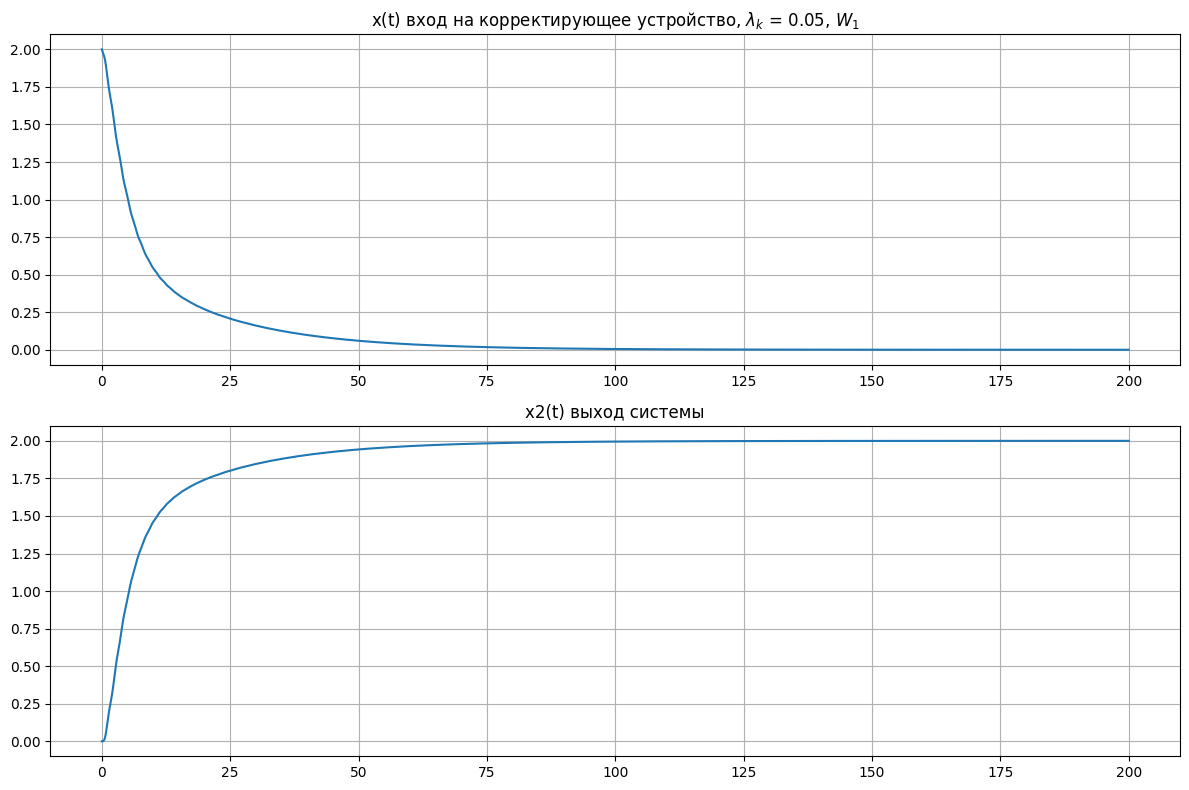

In [68]:
lam = 0.1

w_kor = 5.793
wT = 1
Tkor = wT/w_kor


# Определение модели системы c корректором 1 порядка
def model_1(y, t, u):
    x1, x2, x, y1, y2 = y
    
    x3 = u - x1 - x2
    
    dx1dt = F(x)
    dxdt = lam*Tkor*(-F(x) - y1) + lam*x3 - x
    
    dx2dt = y1
    dy1dt = y2
    
    dy2dt = 2*x1 + 30*F(x) - 0.4*y2 - 20*y1

    
    return [dx1dt, dx2dt, dxdt, dy1dt, dy2dt]



# Временной вектор
t_kor = np.linspace(0, 200, 4000)
# Начальные условия
y0_1 = [0, 0, 0, 0, 0]
u = 2  # Пример постоянного входа

sol_kor = odeint(model_1, y0_1, t_kor, args=(u,))

x_t = u - sol_kor[:, 1] - sol_kor[:, 2]
x_2 = sol_kor[:, 1]


# Построение графиков
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t_kor ,x_t , label='x(t)')
plt.title(fr'x(t) вход на корректирующее устройство, $\lambda_k$ = {lam}, $W_1$')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t_kor, x_2, label='x2(t)')
plt.title('x2(t) выход системы')
plt.grid()

plt.tight_layout()
plt.show()


lam = 0.05

w_kor = 5.793
wT = 1
Tkor = wT/w_kor

# Временной вектор
t_kor = np.linspace(0, 200, 4000)
# Начальные условия
y0_1 = [0, 0, 0, 0, 0]
u = 2  # Пример постоянного входа

sol_kor = odeint(model_1, y0_1, t_kor, args=(u,))

x_t = u - sol_kor[:, 1] - sol_kor[:, 2]
x_2 = sol_kor[:, 1]


# Построение графиков
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t_kor ,x_t , label='x(t)')
plt.title(fr'x(t) вход на корректирующее устройство, $\lambda_k$ = {lam}, $W_1$')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t_kor, x_2, label='x2(t)')
plt.title('x2(t) выход системы')
plt.grid()

plt.tight_layout()
plt.show()